# Attempt to make a classifier for bikes from first 3 lectures of Fastai 2, including kaiming, lusv, batch norm, hooks and call backs

In [1]:
#from expDJ.nb_4Dj import *
from pathlib  import Path
import PIL,os,mimetypes
from expDJ.nb_6DJ import *
import sys
from exp.nb_06 import *
#sys.path
#sys.path.append("/data/fastaiOld/")
#from fastaiOld import datasets

In [2]:
#datasets.URLs.IMAGENETTE_160

## Get the data into a suitable format

In [3]:
#path =  Path('/data/')
#type(path)
#list(path.iterdir())
path = Path('/home/paul/fastaiMyData/bikes/')
Path.ls = lambda x: list(x.iterdir())
path.ls()

[PosixPath('/home/paul/fastaiMyData/bikes/models'),
 PosixPath('/home/paul/fastaiMyData/bikes/__pycache__'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids'),
 PosixPath('/home/paul/fastaiMyData/bikes/folding bikes'),
 PosixPath('/home/paul/fastaiMyData/bikes/beach cruiser'),
 PosixPath('/home/paul/fastaiMyData/bikes/BMX'),
 PosixPath('/home/paul/fastaiMyData/bikes/fastaiOld'),
 PosixPath('/home/paul/fastaiMyData/bikes/mountain bikes'),
 PosixPath('/home/paul/fastaiMyData/bikes/road bikes')]

In [4]:
pathBMX = path/'BMX'

In [5]:
imfn = pathBMX.ls()[51]

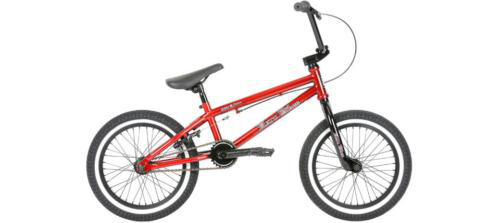

In [6]:
img = PIL.Image.open(imfn)
img

In [7]:
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))
image_extensions

{'.bmp',
 '.gif',
 '.ico',
 '.ief',
 '.jpe',
 '.jpeg',
 '.jpg',
 '.pbm',
 '.pgm',
 '.png',
 '.pnm',
 '.ppm',
 '.ras',
 '.rgb',
 '.svg',
 '.tif',
 '.tiff',
 '.xbm',
 '.xpm',
 '.xwd'}

In [8]:
# get files
def _get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [9]:
t = [o.name for o in os.scandir(pathBMX)]
fn = _get_files(pathBMX, t)
fn[0:4]

[PosixPath('/home/paul/fastaiMyData/bikes/BMX/00000078.png'),
 PosixPath('/home/paul/fastaiMyData/bikes/BMX/00000074.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/BMX/00000007.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/BMX/00000012.jpg')]

In [10]:
list(os.walk(path))

for i, (p, d, f) in enumerate(os.walk(path)):
    print(i, p, d, f)

0 /home/paul/fastaiMyData/bikes ['models', '__pycache__', 'hybrids', 'folding bikes', 'beach cruiser', 'BMX', 'fastaiOld', 'mountain bikes', 'road bikes'] []
1 /home/paul/fastaiMyData/bikes/models [] ['tmp.pth', 'stage-2.pth', 'stage-1.pth']
2 /home/paul/fastaiMyData/bikes/__pycache__ [] ['datasets.cpython-37.pyc']
3 /home/paul/fastaiMyData/bikes/hybrids [] ['00000074.jpg', '00000007.jpg', '00000012.jpg', '00000085.png', '00000025.jpg', '00000054.jpeg', '00000081.jpg', '00000066.jpg', '00000062.jpg', '00000094.jpg', '00000026.jpg', '00000029.jpg', '00000064.jpg', '00000080.jpg', '00000028.jpg', '00000037.jpg', '00000093.jpg', '00000086.jpg', '00000034.jpg', '00000038.jpg', '00000057.jpg', '00000014.jpg', '00000051.jpg', '00000075.jpeg', '00000042.jpg', '00000091.jpg', '00000060.jpg', '00000032.jpg', '00000073.jpg', '00000071.jpg', '00000098.jpg', '00000005.jpg', '00000065.jpg', '00000070.jpg', '00000044.jpg', '00000053.jpg', '00000056.jpg', '00000063.jpeg', '00000059.jpg', '00000027.jp

In [11]:
def setify(o): return o if isinstance(o,set) else set(listify(o))



def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for i,(p,d,f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filenames)
            if include is not None and i==0: d[:] = [o for o in d if o in include]
            else:                            d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)
    
setify([0,1])

extensions = {e.lower() for e in image_extensions}
#extensions

g = os.scandir((path))
next(g), next(g), next(g), next(g), next(g)

fn = get_files(path, extensions=image_extensions, recurse=True)
fn

[PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000074.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000007.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000012.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000085.png'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000025.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000054.jpeg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000081.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000066.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000062.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000094.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000026.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000029.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000064.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000080.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000028.jpg'),
 PosixPat

In [12]:
get_files(path, recurse=True)

[PosixPath('/home/paul/fastaiMyData/bikes/models/tmp.pth'),
 PosixPath('/home/paul/fastaiMyData/bikes/models/stage-2.pth'),
 PosixPath('/home/paul/fastaiMyData/bikes/models/stage-1.pth'),
 PosixPath('/home/paul/fastaiMyData/bikes/__pycache__/datasets.cpython-37.pyc'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000074.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000007.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000012.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000085.png'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000025.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000054.jpeg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000081.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000066.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000062.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000094.jpg'),
 PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000026.jpg'),
 Pos

In [13]:
# Jeremys file list maker thing
#export
class ListContainer():
    def __init__(self, items): self.items = listify(items)
    def __getitem__(self, idx):
        if isinstance(idx, (int,slice)): return self.items[idx]
        if isinstance(idx[0],bool):
            assert len(idx)==len(self) # bool mask
            return [o for m,o in zip(idx,self.items) if m]
        return [self.items[i] for i in idx]
    # returns the length of the list
    def __len__(self): return len(self.items)
    # creates an iterator object
    def __iter__(self): return iter(self.items)
    # set an item (change it)
    def __setitem__(self, i, o): self.items[i] = o
        # delete an item from the list
    def __delitem__(self, i): del(self.items[i])
    # repr - print out the 
    def __repr__(self):
        res = f'{self.__class__.__name__} ({len(self)} items)\n{self.items[:10]}'
        if len(self)>10: res = res[:-1]+ '...]'
        return res
    

# compose applies a list of functions to 
def compose(x, funcs, *args, order_key='_order', **kwargs):
    # get order, if no order set to 0, getattr
    
    key = lambda o: getattr(o, order_key, 0)
    # loop through functions
    for f in sorted(listify(funcs), key=key):
        #print(f)
        x = f(x, **kwargs)
    return x

class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        super().__init__(items)
        self.path,self.tfms = Path(path),tfms
    # repr adds the path to the repr
    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'
    # new  creates a new version of the class with the new items and the same transforms
    def new(self, items, cls=None):
        if cls is None: cls=self.__class__
        return cls(items, self.path, tfms=self.tfms)
    
    # get doesn't do anything but can be over ridden
    def  get(self, i): return i
    def _get(self, i): return compose(self.get(i), self.tfms)
    # get item  
    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res,list): return [self._get(o) for o in res]
        return self._get(res)
    

class ImageList(ItemList):
    # cls refers to the class
    @classmethod 
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        #print(f'Class: {cls}')
        if extensions is None: extensions = image_extensions
        # cls calls the class init
        return cls(get_files(path, extensions, recurse=recurse, include=include), path, **kwargs)
    # override get to print image
    def get(self, fn): return PIL.Image.open(fn)
    
    
# Compose test
def add1(x): return [i + 1 for i in x]
def times2(x): return 2*x

aa = [1,2]

f1 = add1
f2 = times2
f1._order = 12
f2._order = 1
#aaa = compose(aa, [add1, times2])
#aaa
#x = [1, 2, 4]
#g = compose(x, None # None doesn't start the loop
#gg = compose(x, add1)
#g, gg

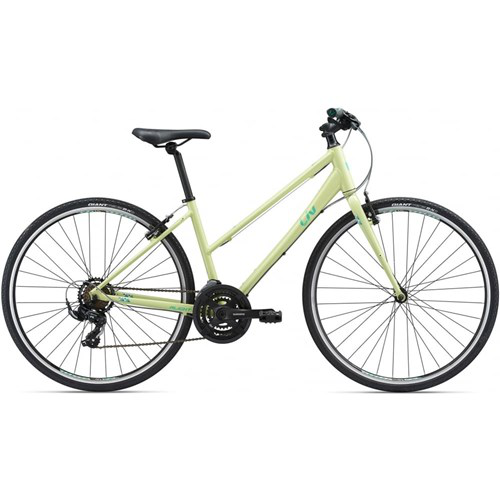

In [14]:
# ListContainer tests
x = ListContainer(range(14))
xIt = iter(x)
x[1] = 66

# compose function
def add1(x):
    return x + 1

def times2(x):
    return 2*x

g = add1
g._order = 1 # monkey patch an _order

f = compose(2, [g, times2]) 

# Item list test
ims = ItemList(get_files(path, recurse = True))
ims2 = ImageList(get_files(path, recurse = True, extensions = extensions))
newImns = ims.new([1, 2, 3, 4, 5])

# Image list 


x,x[0, 1, 4], next(xIt), next(xIt), f, ims, ims[0], type(newImns)

ims2[93]


In [15]:
# make rgb transform
#export
class Transform(): _order=0

class MakeRGB(Transform):
    def __call__(self, item): return item.convert('RGB')

def make_rgb(item): return item.convert('RGB')

In [16]:
ims = ImageList.from_files(path, tfms = make_rgb)
ims.items[0].parent


PosixPath('/home/paul/fastaiMyData/bikes/hybrids')

In [17]:

# split data class
import numpy as np

def split_by_func(items, f):
    mask = [f(o) for o in items]
     #`None` values will be filtered out
    f = [o for o,m in zip(items,mask) if m==False]
    t = [o for o,m in zip(items,mask) if m==True ]
    return f,t


# rand splitter based on folder name
def randFolderSplit(items, split = 0.7, ext = None):
    clses = []
    [clses.append(c.parent) for c in ims.items if c.parent not in clses]
    val = []
    trn = []
    for dx in clses:
        f = get_files(dx, extensions=ext)
        rnd = torch.randperm(len(f))
        rndTrn = rnd[0:int(len(f)*split)]
        #print(rndTrn)
        rndVal = rnd[int(len(f)*split):]
        tVal = [f[i] for i in rndVal]
        #print(rndVal)
        tTrn = [f[i] for i in rndTrn]
        #rng = range(int(len(f)*split))
        #tTrn = [f[rnd[i]] for i in rng]
        
        trn = trn + tTrn
        val = val + tVal 
        
    return trn, val


# Split data class can contain any two objects, named train and valid.
# However, you can use the split by methods on a list to create two new lists
class SplitData():
    def __init__(self, train, valid): self.train,self.valid = train,valid
        
    def __getattr__(self,k): return getattr(self.train,k)
    #This is needed if we want to pickle SplitData and be able to load it back without recursion errors
    def __setstate__(self,data:Any): self.__dict__.update(data) 
    
    @classmethod
    def split_by_func(cls, il, f):
        lists = map(il.new, split_by_func(il.items, f))
        return cls(*lists)
    @classmethod
    def split_rnd(cls, il, f):
        lists = map(il.new, f(il))
        return cls(*lists)

    def __repr__(self): return f'{self.__class__.__name__}\nTrain: {self.train}\nValid: {self.valid}\n'
    
# splitter function

# get image classes from parent folder and maintain order
def getClassesFrmPrnt(ims):
    clses = []
    [clses.append(c.parent) for c in ims.items if c.parent not in clses]
    return clses
    
# needs to return true if the image is assigned to the validation set or false if assigned to the training set
#classes = randFolderSplit(ims)
        
idx = torch.randperm(5)
g = range(2)
x = [0, 1, 2, 3, 4, 6, 7, 8]
xx = [x[idx[i]] for i in g]
xx = []
xx + x
randFolderSplit(ims.items)
sd = SplitData.split_rnd(ims, partial(randFolderSplit, ext = extensions))
sd
#classes, get_files(class es[0])
#len(get_files(classes[0], extensions=extensions)), torch.randperm(100), [x for x in os.scandir(path)], classes
#ims.items[0], ims.items[100], ims.items[200], ims.items[300], ims.items[400], ims.items[500], ims.items[-1], classes

SplitData
Train: ImageList (402 items)
[PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000042.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000049.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000004.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000038.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000017.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000097.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000061.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000039.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000093.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000060.jpg')...]
Path: /home/paul/fastaiMyData/bikes
Valid: ImageList (176 items)
[PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000015.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000043.jpeg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000002.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybr

In [18]:
#export
from collections import OrderedDict

# Uniqueify function simply finds the unique items in a list
def uniqueify(x, sort=False):
    res = list(OrderedDict.fromkeys(x).keys())
    if sort: res.sort()
    return res


# Processor class to label each category
class Processer():
    def process(self, items): return items

    
# Categoty Processor enumerates all the categories in an image set
# Passing an image categories to the object will create the 'vocab'  and return the integer image labels
# if the vocab is already labelled, it will apply the vocab to new imageset
# The mapping is contained in the otoi dictionary
class CategoryProcessor(Processer):
    def __init__(self): self.vocab = None
        
    def __call__(self, items):
        if self.vocab is None:
            self.vocab = uniqueify(items)
            self.otoi  = {v:k for k,v in enumerate(self.vocab)}
        return [self.proc1(o) for o in items]
    
    def proc1(self, item):  return self.otoi[item]
    
    def deprocess(self, idxs):
        assert self.vocab is not None
        return [self.deproc1(idx) for idx in idxs]
    def deproc1(self, idx): return self.vocab[idx]
    

            
x = CategoryProcessor()
smpNames = [smp.parent.name for smp in sd.train.items]
smpNamesV = [smp.parent.name for smp in sd.valid.items]
f = x(smpNames)
ff = x(smpNamesV)
g = [i == 0 for i in f]
len(g), type(sd.train)

#h = _label_by_func_(sd.train, parentLabeller)
#x.vocab, x.otoi

(402, __main__.ImageList)

In [19]:
# the parent labeller returns the name of the parent folder of a pil image
def parentLabeller(im): return im.parent.name

# the _label_by_func_ function applies returns a label for all items from a Labeller 
# where f is the labeller function and ds is the imageset
def _label_by_func_(ds, f, cls=ItemList): return cls([f(o) for o in ds.items], path=ds.path)

In [20]:
# The labelled data class contains images and labels
# x is the input data and y is the output

def _label_by_func(ds, f, cls=ItemList): return cls([f(o) for o in ds.items], path=ds.path)

class LabeledData():
    def process(self, il, proc): return il.new(compose(il.items, proc)) # Creates a new image list from the input image lists

    def __init__(self, x, y, proc_x=None, proc_y=None):
        self.x,self.y = self.process(x, proc_x),self.process(y, proc_y)
        self.proc_x,self.proc_y = proc_x,proc_y
        
    def __repr__(self): return f'{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n'
    def __getitem__(self,idx): return self.x[idx],self.y[idx]
    def __len__(self): return len(self.x)
    
    def x_obj(self, idx): return self.obj(self.x, idx, self.proc_x)
    def y_obj(self, idx): return self.obj(self.y, idx, self.proc_y)
    
    # obj is for returning objects
    def obj(self, items, idx, procs):
        isint = isinstance(idx, int) or (isinstance(idx,torch.LongTensor) and not idx.ndim)
        item = items[idx]
        for proc in reversed(listify(procs)):
            item = proc.deproc1(item) if isint else proc.deprocess(item)
        return item

    @classmethod
    def label_by_func(cls, il, f, proc_x=None, proc_y=None):
        return cls(il, _label_by_func(il, f), proc_x=proc_x, proc_y=proc_y)

# function to create a new split data list. where the train and valid imagelists are replaced by train and valid Labelled data objects
def label_by_func(sd, f, proc_x=None, proc_y=None):
    train = LabeledData.label_by_func(sd.train, f, proc_x=proc_x, proc_y=proc_y)
    valid = LabeledData.label_by_func(sd.valid, f, proc_x=proc_x, proc_y=proc_y)
    return SplitData(train,valid)

In [21]:
ll = label_by_func(sd, parentLabeller, proc_y= CategoryProcessor())
ll
assert ll.train.proc_y is ll.valid.proc_y

ll.train.proc_y.vocab,ll.valid.proc_y.vocab, 
ll.train.y_obj(100)

'folding bikes'

In [22]:
# Transforms to convert pPiL objecst to tensors
class ResizeFixed(Transform):
    _order=10
    def __init__(self,size):
        if isinstance(size,int): size=(size,size)
        self.size = size
        
    def __call__(self, item): return item.resize(self.size, PIL.Image.BILINEAR)

def to_byte_tensor(item):
    res = torch.ByteTensor(torch.ByteStorage.from_buffer(item.tobytes()))
    w,h = item.size
    return res.view(h,w,-1).permute(2,0,1)
to_byte_tensor._order=20

def to_float_tensor(item): return item.float().div_(255.)
to_float_tensor._order=30

In [23]:
# All steps
tfmsx = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]

    
class blkWhite(Transform):
    _order = 3
    
    def __call__(self, item):
        return item.convert('1')

#tfmsx = [blkWhite()]

il2 = ImageList.from_files(path, tfms=tfmsx)
sd = SplitData.split_rnd(il2, partial(randFolderSplit, ext = extensions))
lll = label_by_func(sd, parentLabeller, proc_y=CategoryProcessor())
lll.train.x[100:103]

[tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
       

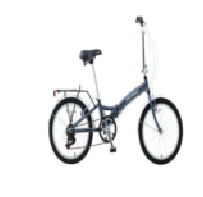

In [24]:
def show_image(im, figsize=(3,3)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(im.permute(1,2,0))

    
x,y = lll.train[101]
show_image(x)

In [25]:
lll

SplitData
Train: LabeledData
x: ImageList (402 items)
[PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000075.jpeg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000004.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000041.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000099.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000059.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000039.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000037.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000038.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000070.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000010.jpg')...]
Path: /home/paul/fastaiMyData/bikes
y: ItemList (402 items)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0...]
Path: /home/paul/fastaiMyData/bikes

Valid: LabeledData
x: ImageList (176 items)
[PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000043.jpeg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/

In [26]:
## Data loader part

from torch.utils.data import DataLoader

#def get_dls(train_ds, valid_ds, bs, **kwargs):
#    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
#            DataLoader(valid_ds, batch_size=bs*2, **kwargs))

def get_dlsDJ(train_ds, valid_ds, bs, **kwargs):
    train_dl = DataLoader(train_ds, bs, num_workers=4, shuffle=True,  **kwargs)
    valid_dl = DataLoader(valid_ds, 2*bs, num_workers=4, shuffle=True, **kwargs)
    return train_dl, valid_dl

train_dl, valid_dl = get_dlsDJ(lll.train, lll.valid, 64)


#x = {'boom': 1, 'doom': 'hello'}
#'boom' in x, x["doom"]

In [27]:
# Check can iterate through 
x,y = next(iter(train_dl))

In [28]:
x.shape, y, train_dl.dataset, valid_dl.dataset

(torch.Size([64, 3, 128, 128]),
 tensor([3, 5, 5, 1, 2, 4, 0, 3, 2, 5, 4, 2, 1, 5, 1, 2, 0, 4, 0, 5, 3, 0, 0, 1,
         5, 3, 0, 2, 4, 1, 1, 1, 2, 4, 3, 5, 5, 3, 5, 2, 3, 1, 5, 1, 2, 4, 1, 0,
         4, 0, 2, 0, 1, 2, 3, 1, 3, 3, 3, 3, 4, 1, 2, 3]),
 LabeledData
 x: ImageList (402 items)
 [PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000075.jpeg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000004.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000041.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000099.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000059.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000039.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000037.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000038.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000070.jpg'), PosixPath('/home/paul/fastaiMyData/bikes/hybrids/00000010.jpg')...]
 Path: /home/paul/fastaiMyData/bikes
 y: ItemList (4

'beach cruiser'

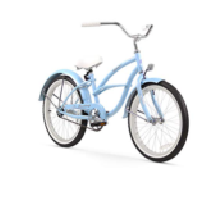

In [29]:
show_image(x[62])
ll.train.proc_y.vocab[y[62]]

In [30]:
# Make a data bunch
class DataBunchDJ2():
    def __init__(self, train_dl, valid_dl, c_in = None, c_out = None):
        self.train_dl, self.valid_dl = train_dl, valid_dl
        
        self.c_in, self.c_out = c_in, c_out
        
    @property
    def train_ds(self): return self.train_dl.dataset
    
    @property
    def valid_ds(self): return self.valid_dl.dataset

In [31]:
db = DataBunchDJ2(train_dl, valid_dl)
a = next(iter(db.valid_ds))

a

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]), 0)

Below is a complete work flow for creating a data bunch to provide data to the runner

In [32]:
# 1 Set the path
tfmsx = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]
path2 = Path('/home/paul/fastaiMyData/bikes/')
# 2 Create a image container object
I = ImageList.from_files(path2, tfms = tfmsx, extensions=extensions, recurse=True)
# 3 Split data, 
spltDat = SplitData.split_rnd(I, partial(randFolderSplit, ext = extensions))
# 4 Label data
lblDat = label_by_func(spltDat, parentLabeller, proc_y= CategoryProcessor())
# 5 Create data loaders
train_dl1, valid_dl1 = get_dlsDJ(lblDat.train, lblDat.valid, bs = 64)
# 6 Make Databunchaa
db = DataBunchDJ2(train_dl1, valid_dl1, c_in=3, c_out=6) # c_out is thh numbber of bike catogories
lblDat.train.x[4:7]

[tensor([[[0.8510, 0.8588, 0.8627,  ..., 0.7451, 0.7294, 0.7412],
          [0.7961, 0.8392, 0.8471,  ..., 0.7020, 0.7216, 0.7020],
          [0.8196, 0.8275, 0.8196,  ..., 0.6902, 0.7333, 0.7412],
          ...,
          [0.6863, 0.7020, 0.6863,  ..., 0.1059, 0.1255, 0.1373],
          [0.6235, 0.6510, 0.6706,  ..., 0.1059, 0.0980, 0.1059],
          [0.5608, 0.5882, 0.6078,  ..., 0.3176, 0.2157, 0.1333]],
 
         [[0.7569, 0.7765, 0.8000,  ..., 0.6392, 0.6196, 0.6314],
          [0.6941, 0.7412, 0.7608,  ..., 0.5490, 0.6039, 0.5804],
          [0.7176, 0.7294, 0.7216,  ..., 0.5216, 0.6039, 0.6275],
          ...,
          [0.6000, 0.6157, 0.6000,  ..., 0.0902, 0.0980, 0.1098],
          [0.5373, 0.5647, 0.5843,  ..., 0.0980, 0.0863, 0.0902],
          [0.4784, 0.5059, 0.5255,  ..., 0.2627, 0.1686, 0.1059]],
 
         [[0.4784, 0.5137, 0.5529,  ..., 0.3843, 0.3176, 0.3451],
          [0.3843, 0.4471, 0.4980,  ..., 0.2627, 0.3255, 0.3216],
          [0.4118, 0.4314, 0.4314,  ...,

## Make a model

In [33]:
# Get the mean and std of the first databunch (need to normali\e in input images) 
m,s = x.mean((0,2,3)).cuda(),x.std((0,2,3)).cuda()
m,s, x.mean((0, 2, 3))



(tensor([0.7731, 0.7686, 0.7571], device='cuda:0'),
 tensor([0.3092, 0.3114, 0.3224], device='cuda:0'),
 tensor([0.7731, 0.7686, 0.7571]))

In [34]:
# Make function to normalize inputs
def normalize_chan(x, mean, std):
   # print(x.shape, mean.shape, std.shape)
    return (x-mean[...,None,None]) / std[...,None,None]

_m = tensor([0.7934, 0.7925, 0.7890])
_s = tensor([0.3122, 0.3123, 0.3170])

xNrm = normalize_chan(x, mean = _m, std = _s)


In [35]:
# Thisi
norm_bikes = partial(normalize_chan, mean = _m.cuda(), std = _s.cuda())


In [36]:
# Callback functions
cbfs = [partial(AvgStatsCallback,accuracy),
        CudaCallback]
cbfs.append(partial(BatchTransformXCallback, norm_bikes))

In [37]:
nfs = [64,64,128,256] # 

In [38]:
# Build a new conv layer which includes batch norm
def conv_layer(ni, nf, ks=3, stride=2, bn=True, **kwargs):
    layers = [nn.Conv2d(ni, nf, ks, padding=ks//2, stride=stride, bias=not bn),
              GeneralRelu(**kwargs)]
    if bn: layers.append(nn.BatchNorm2d(nf, eps=1e-5, momentum=0.1))
    return nn.Sequential(*layers)

In [39]:
#export
import math
def prev_pow_2(x): return 2**math.floor(math.log2(x))

def get_cnn_layers(data, nfs, layer, **kwargs):
    def f(ni, nf, stride=2): return layer(ni, nf, 3, stride=stride, **kwargs)
    l1 = data.c_in
    l2 = prev_pow_2(l1*3*3)
    layers =  [f(l1  , l2  , stride=1),
               f(l2  , l2*2, stride=2),
               f(l2*2, l2*4, stride=2)]
    nfs = [l2*4] + nfs
    layers += [f(nfs[i], nfs[i+1]) for i in range(len(nfs)-1)]
    layers += [nn.AdaptiveAvgPool2d(1), Lambda(flatten), 
               nn.Linear(nfs[-1], data.c_out)]
    return layers

def get_cnn_model(data, nfs, layer, **kwargs):
    print(data)
    return nn.Sequential(*get_cnn_layers(data, nfs, layer, **kwargs))

def get_learn_run(nfs, data, lr, layer, cbs=None, opt_func=None, **kwargs):
    model = get_cnn_model(data, nfs, layer, **kwargs)
    #init_cnn(model)
    return get_runner(model, data, lr=lr, cbs=cbs, opt_func=opt_func)

In [40]:
# Combined scheduler
sched = combine_scheds([0.3, 0.7], [sched_cos(0.3, 0.6), sched_cos(0.6, 0.2)]) 

In [41]:
learn,run = get_learn_run(nfs, db, 0.2, partial(conv_layer, bn = True), cbs=cbfs+[
    partial(ParamScheduler, 'lr', sched)
])

Metrics:
<function accuracy at 0x7f657ee7e7b8>
Metrics:
<function accuracy at 0x7f657ee7e7b8>


In [42]:
a = next(iter(db.valid_dl))
a[0].shape, run

(torch.Size([128, 3, 128, 128]), <exp.nb_05b.Runner at 0x7f657c2f2588>)

In [43]:
# Get batch function to get a single batch
def get_batch(dl, run):
    run.xb,run.yb = next(iter(dl))
    for cb in run.cbs: cb.set_runner(run)
    run('begin_batch')
    return run.xb,run.yb

In [44]:
#export
def model_summary(run, learn, data, find_all=False):
    xb,yb = get_batch(data.valid_dl, run)
    device = next(learn.model.parameters()).device#Model may not be on the GPU yet
    xb,yb = xb.to(device),yb.to(device)
    mods = find_modules(learn.model, is_lin_layer) if find_all else learn.model.children()
    f = lambda hook,mod,inp,out: print(f"{mod}\n{out.shape}\n")
    with Hooks(mods, f) as hooks: learn.model(xb)

In [45]:
# Summary of the model
model_summary(run, learn, db)
#cbfs

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 16, 128, 128])

Sequential(
  (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 32, 64, 64])

Sequential(
  (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 64, 32, 32])

Sequential(
  (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 64, 16, 16])

Sequential(
  (0): Conv2d(64, 64, kernel_size=(

In [46]:
%time run.fit(50, learn)
#torch.cuda.empty_cache()

train: [1.7223519851912314, tensor(0.2935, device='cuda:0')]
valid: [1.793866591020064, tensor(0.1875, device='cuda:0')]
train: [1.3204570409670398, tensor(0.5249, device='cuda:0')]
valid: [1.7407647913152522, tensor(0.1932, device='cuda:0')]
train: [0.9109751383463541, tensor(0.6866, device='cuda:0')]
valid: [1.8429040041836826, tensor(0.1932, device='cuda:0')]
train: [0.9162350175392568, tensor(0.6667, device='cuda:0')]
valid: [1.6154618696732954, tensor(0.3580, device='cuda:0')]
train: [0.6981857831205301, tensor(0.7786, device='cuda:0')]
valid: [1.3988418579101562, tensor(0.5511, device='cuda:0')]
train: [0.4658174277538091, tensor(0.8607, device='cuda:0')]
valid: [1.3393104726617986, tensor(0.5909, device='cuda:0')]
train: [0.2959742380018851, tensor(0.9030, device='cuda:0')]
valid: [19.933894764293324, tensor(0.2159, device='cuda:0')]
train: [1.7605533125388682, tensor(0.4602, device='cuda:0')]
valid: [3.9583410783247515, tensor(0.3011, device='cuda:0')]
train: [0.884707170932447

# Classes

## List container
List container - base classs which stores a list and specifies some dunder methods 
## Item container
Base class is the list container -  as well as items, stores any image transforms that may be applied to them. The _get method returns a single item from the items list, via the __getitem__ method (which allows you to index into a list and return the item) . The compose function (from outside the class) is used to apply transforms in order if the transform class has a _order member

The new method allows a new class containing the same transforms as the original class to be generated

Also contains a path attribute, which gived the item path.

## Image container
Base class - Item container
Polymorphs the get method to return an PIL image from the list

Adds a class which acts like a constructor to get image files from a directory using the get files method with a list of file extensions

## Split data container
No base class

Contains a train image container and a valid image container. But can contain any object in the train and valid members

Class methods used to initiate a train and validation set prior to initiating an object


## Processor 
Base class for processors - containing some items, nothing more

A processor class is a member of a labelled data class, defining the numerical labelling for each catogory in a dataseta
 
## Catgory processor
Base class - Processor

Call on a list of items and it enumerates them and stores the result,  so that the enumeration can be applied to another dataset. Enumeration is assigned to the vocab member. If the object is called and the vocab = None, then create the vocab by enumerating 

## Labelled data
No base class



# Functions
compose - 

getitems - 

Uniqueify - Finds unique items in a list and returns them in the same order in which they appear in the list

In [47]:
list((learn.model.parameters()))[0]

Parameter containing:
tensor([[[[-0.2865, -0.0807, -0.1417],
          [-0.2907, -0.1342,  0.2102],
          [ 0.1505,  0.0320,  0.1297]],

         [[-0.1098, -0.2776, -0.0143],
          [ 0.0099, -0.1155,  0.1844],
          [ 0.1961,  0.0551,  0.1203]],

         [[-0.0845, -0.1646,  0.2480],
          [-0.0954, -0.0397,  0.1074],
          [ 0.1439,  0.2808,  0.1129]]],


        [[[ 0.0120, -0.1641, -0.0088],
          [-0.1136, -0.1050, -0.0393],
          [ 0.0171,  0.0545, -0.2399]],

         [[-0.1152,  0.0484,  0.1627],
          [ 0.0597, -0.0540, -0.2109],
          [ 0.1830, -0.0151, -0.0879]],

         [[ 0.1783, -0.0455, -0.1037],
          [ 0.0520,  0.0535, -0.0516],
          [-0.1025, -0.1543,  0.0087]]],


        [[[ 0.0233, -0.1846,  0.1077],
          [ 0.0294,  0.0096, -0.0242],
          [ 0.0452, -0.0417, -0.0485]],

         [[ 0.1684, -0.0178, -0.0665],
          [ 0.1373,  0.0812,  0.0379],
          [ 0.0229, -0.1928, -0.1223]],

         [[ 0.0366, -0